# Nasville House Price

- **Problem:** Nasville House Price is not yet analysed and determined on which features affecting its price. 
- **Objective:** Using Linear regression model to predict the house price in Nasvile and to determine which features important to the hourse price.

**Brief Overview of Market Trend:** "Nashville market trends indicate an increase of \$19,000 (7percent) in median home sales over the past year. The average price per square foot for this same period rose to \$195, up from \$180.", quoted from Trulia. (source: https://www.trulia.com/real_estate/Nashville-Tennessee/market-trends/)

**Data Set:** The data is collected from Kaggle.com: https://www.kaggle.com/tmthyjames/nashville-housing-data.
The data has 56,000+ observations with 29 variables (31 columns). 

## Data Collection and Visualization

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
#Input the dataset
df= pd.read_csv("Nashville_housing.csv")
df.head()

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,0,0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,8,NASHVILLE,1/24/13,132000,20130128-0008725,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NaN,NASHVILLE,1/11/13,191500,20130118-0006337,...,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,2,2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NaN,NASHVILLE,1/18/13,202000,20130124-0008033,...,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,3,3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NaN,NASHVILLE,1/18/13,32000,20130128-0008863,...,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,4,4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NaN,NASHVILLE,1/23/13,102000,20130131-0009929,...,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0


In [86]:
df.columns

Index([u'Unnamed: 0', u'Unnamed: 0.1', u'Parcel ID', u'Land Use',
       u'Property Address', u'Suite/ Condo   #', u'Property City',
       u'Sale Date', u'Sale Price', u'Legal Reference', u'Sold As Vacant',
       u'Multiple Parcels Involved in Sale', u'Owner Name', u'Address',
       u'City', u'State', u'Acreage', u'Tax District', u'Neighborhood',
       u'image', u'Land Value', u'Building Value', u'Total Value',
       u'Finished Area', u'Foundation Type', u'Year Built', u'Exterior Wall',
       u'Grade', u'Bedrooms', u'Full Bath', u'Half Bath'],
      dtype='object')

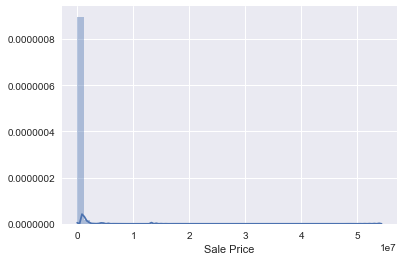

In [7]:
%matplotlib inline
sns.distplot(df['Sale Price']);

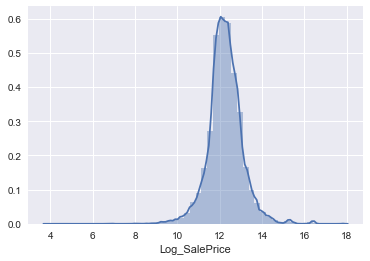

In [9]:
df['Log_SalePrice']=np.log(df['Sale Price'])
sns.distplot(df['Log_SalePrice']);

In [10]:
df['Sale Price'].describe()
#df['Log_SalePrice'].describe()

count    5.663600e+04
mean     3.272111e+05
std      9.287425e+05
min      5.000000e+01
25%      1.350000e+05
50%      2.054500e+05
75%      3.290000e+05
max      5.427806e+07
Name: Sale Price, dtype: float64

In [11]:
print("Skewness: %f" % df['Log_SalePrice'].skew())
print("Kurtosis: %f" % df['Log_SalePrice'].kurt())

Skewness: 0.153798
Kurtosis: 4.001960


In [12]:
df['Log_TotalValue']=np.log(df['Total Value'])
df['Log_FinishedArea']=np.log(df['Finished Area'])

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


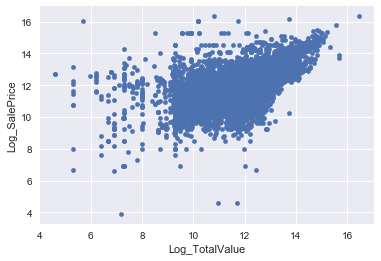

In [13]:
#scatter plot sale price and 
var = 'Log_TotalValue'
data = pd.concat([df['Log_SalePrice'], df[var]], axis=1)
data.plot.scatter(x=var, y='Log_SalePrice');

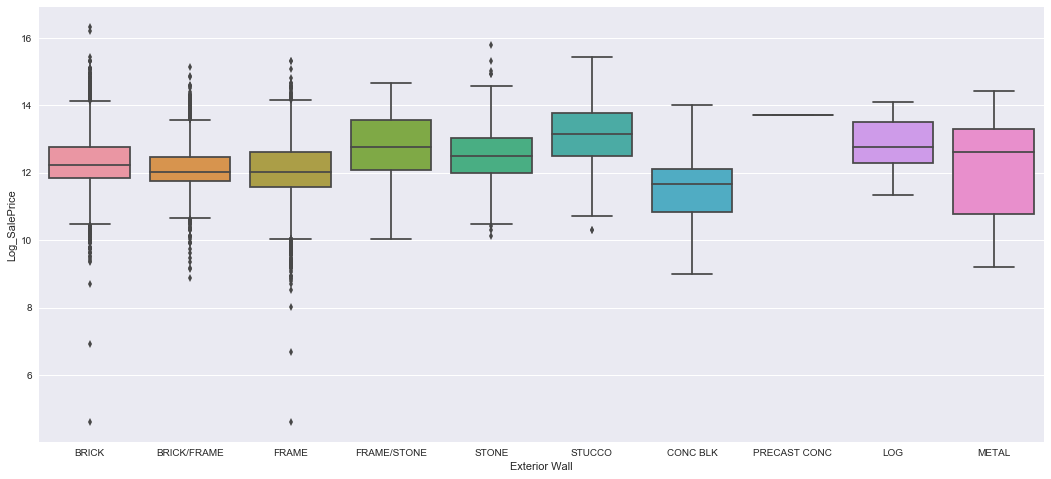

In [93]:
var = 'Exterior Wall'
data = pd.concat([df['Log_SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="Log_SalePrice", data=data)

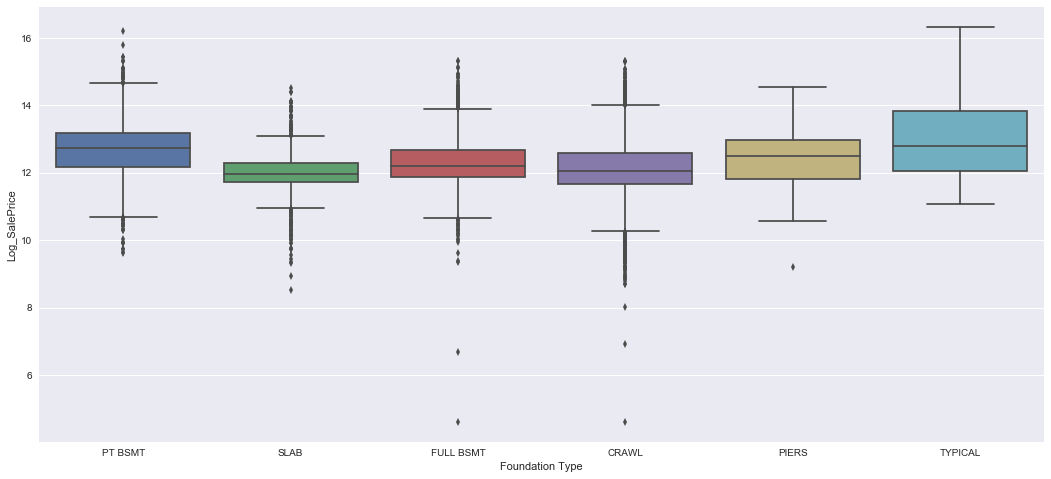

In [94]:
var = 'Foundation Type'
data = pd.concat([df['Log_SalePrice'], df[var]], axis=1)
f, ax = plt.subplots(figsize=(18, 8))
fig = sns.boxplot(x=var, y="Log_SalePrice", data=data)

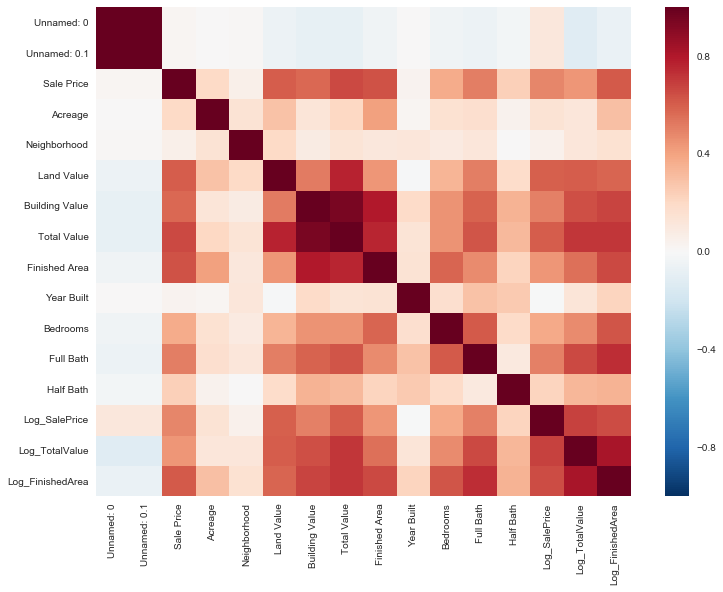

In [14]:
#correlation matrix
corrmat = df.corr()
f, ax = plt.subplots(figsize=(12, 9))
#sns.heatmap(corrmat, vmax=.8, square=True);
sns.heatmap(corrmat)

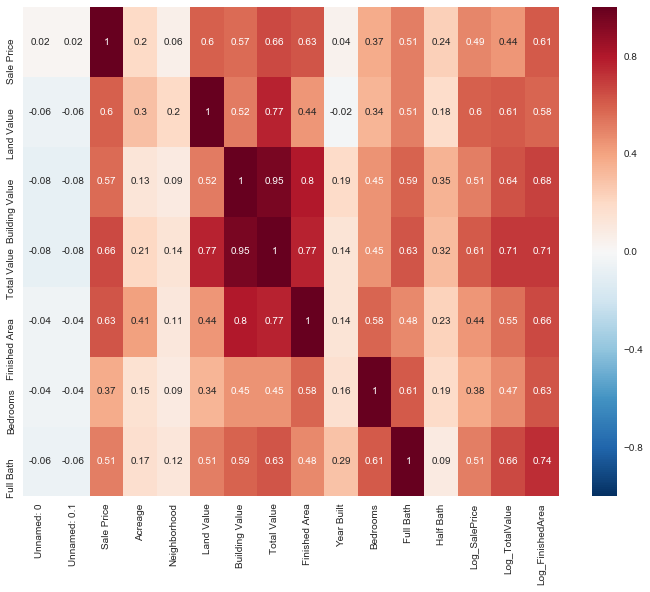

In [15]:
C= corrmat.drop(['Neighborhood','Unnamed: 0','Unnamed: 0.1', 'Acreage','Year Built', 'Half Bath', 'Log_SalePrice', 'Log_TotalValue', 'Log_FinishedArea'])
C=C.round(2)
f, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(C, annot=True)

It looks like Sale price has moderate correlation with land value, building value, total value, finished value and full bath. Sale price also has weak correlation with Acreage and Half bath.  

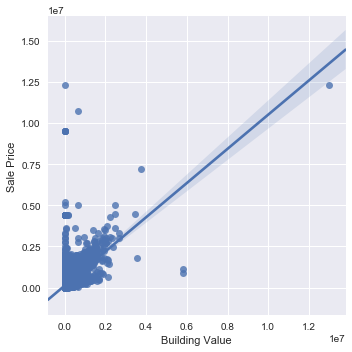

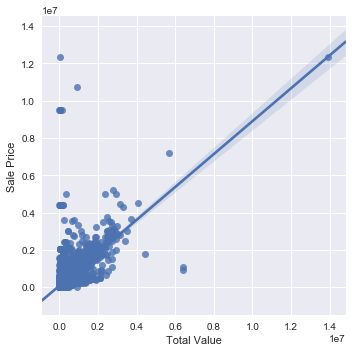

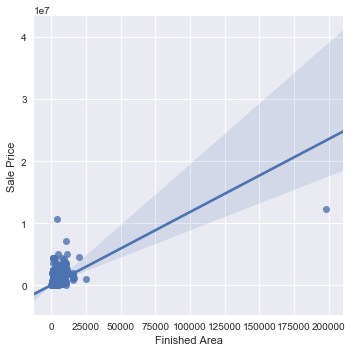

In [42]:
sns.lmplot('Building Value', 'Sale Price', data= df)
sns.lmplot('Total Value', 'Sale Price', data= df)
sns.lmplot('Finished Area', 'Sale Price', data= df)

## Data Wrangling

In [97]:
#missing data
total = df.isnull().sum().sort_values(ascending=False)
percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
dtype=df.dtypes
missing_data = pd.concat([total, percent,dtype], axis=1, keys=['Total', 'Percent','dtype'])
missing_data.sort_values(by='Total',ascending=False).head(24)

,Total,Percent,dtype
Suite/ Condo #,50527,0.892136,object
Half Bath,32490,0.573663,float64
Bedrooms,32477,0.573434,float64
Foundation Type,32472,0.573346,object
Year Built,32471,0.573328,float64
Exterior Wall,32471,0.573328,object
Grade,32471,0.573328,object
Finished Area,32470,0.573310,float64
Log_FinishedArea,32470,0.573310,float64
Full Bath,32359,0.571350,float64


In [98]:
duplicate_address = df.loc[(df['Property Address'].duplicated())]
duplicate_address

,Unnamed: 0,Unnamed: 0.1,Parcel ID,Land Use,Property Address,Suite/ Condo #,Property City,Sale Date,Sale Price,Legal Reference,...,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Log_SalePrice,Log_TotalValue,Log_FinishedArea
8,8,8,119 13 0 183.00,SINGLE FAMILY,501 MORTON AVE,NaN,NASHVILLE,1/25/13,49900,20130128-0008950,...,CRAWL,1932.0,FRAME,D,2.0,1.0,0.0,10.817776,11.342137,7.103322
36,36,36,171 03 0B 193.00,RESIDENTIAL CONDO,641 OLD HICKORY BLVD,403,BRENTWOOD,1/17/13,234900,20130124-0007900,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.366915,NaN,NaN
53,53,53,173 09 0A 072.00,SINGLE FAMILY,7722 PORTER HOUSE DR,NaN,NASHVILLE,1/7/13,161000,20130116-0005277,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.989160,NaN,NaN
97,97,97,092 16 0E 121.00,RESIDENTIAL CONDO,900 20TH AVE S,1205,NASHVILLE,1/23/13,390000,20130131-0010043,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.873902,NaN,NaN
100,100,100,102 07 0A 049.00,RESIDENTIAL CONDO,6680 CHARLOTTE PIKE,H-1,NASHVILLE,1/11/13,40000,20130115-0004880,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.596635,NaN,NaN
106,106,106,103 14 0A 048.00,RESIDENTIAL CONDO,4500 POST RD,48,NASHVILLE,1/11/13,186500,20130115-0004732,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.136187,NaN,NaN
108,108,108,103 16 0C 403.00,RESIDENTIAL CONDO,4225 HARDING PIKE,403,NASHVILLE,1/8/13,225000,20130117-0005717,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.323856,NaN,NaN
149,149,149,128 03 0A 004.00,SINGLE FAMILY,413 CEDAR FOREST DR,NaN,NASHVILLE,1/14/13,205000,20130123-0007526,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.230765,NaN,NaN
300,300,300,083 06 0 365.00,VACANT RES LAND,511 N 17TH ST,NaN,NASHVILLE,1/31/13,129900,20130201-0010656,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.774520,NaN,NaN
407,407,407,093 05 2B 053.00,RESIDENTIAL CONDO,700 CHURCH ST,805,NASHVILLE,1/30/13,175000,20130131-0010115,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,12.072541,NaN,NaN


In [99]:
#drop duplicate rows
nodup=df.drop_duplicates(['Property Address'], keep='first')
nodup['Property Address'].duplicated().sum()
#drop some variables
clean_df=nodup.drop(["Suite/ Condo   #", 'Log_TotalValue','Log_FinishedArea','Owner Name','image','Legal Reference','State', 'Unnamed: 0.1','Unnamed: 0', 'Address', 'City', 'Multiple Parcels Involved in Sale'], axis=1)

In [100]:
clean_df.columns

Index([u'Parcel ID', u'Land Use', u'Property Address', u'Property City',
       u'Sale Date', u'Sale Price', u'Sold As Vacant', u'Acreage',
       u'Tax District', u'Neighborhood', u'Land Value', u'Building Value',
       u'Total Value', u'Finished Area', u'Foundation Type', u'Year Built',
       u'Exterior Wall', u'Grade', u'Bedrooms', u'Full Bath', u'Half Bath',
       u'Log_SalePrice'],
      dtype='object')

In [101]:
#missing data version 2
total = clean_df.isnull().sum().sort_values(ascending=False)
percent = (clean_df.isnull().sum()/clean_df.isnull().count()).sort_values(ascending=False)
dtype=clean_df.dtypes
missing_data = pd.concat([total, percent,dtype], axis=1, keys=['Total', 'Percent','dtype'])
missing_data.sort_values(by='Total', ascending=False).head(20)

,Total,Percent,dtype
Half Bath,23435,0.519980,float64
Bedrooms,23427,0.519803,float64
Foundation Type,23423,0.519714,object
Year Built,23422,0.519692,float64
Exterior Wall,23422,0.519692,object
Grade,23422,0.519692,object
Finished Area,23421,0.519670,float64
Full Bath,23318,0.517384,float64
Total Value,21853,0.484879,float64
Tax District,21853,0.484879,object


In [102]:
most_common = pd.get_dummies(clean_df['Tax District']).sum().sort_values(ascending=False).index[0] 
def replace_most_common(x):
    if pd.isnull(x):
        return most_common
    else:
        return x

clean_df['Tax District'] = clean_df['Tax District'].map(replace_most_common)
#clean_train2=clean_train.dropna(subset=['Property Address'],how='all')
#clean_train.groupby('Tax District').size()
clean_df.groupby('Tax District').size()

Tax District
CITY OF BELLE MEADE            220
CITY OF BERRY HILL              20
CITY OF FOREST HILLS           372
CITY OF GOODLETTSVILLE         354
CITY OF OAK HILL               363
GENERAL SERVICES DISTRICT     4239
URBAN SERVICES DISTRICT      39501
dtype: int64

In [103]:
most_common = pd.get_dummies(clean_df['Exterior Wall']).sum().sort_values(ascending=False).index[0] 
def replace_most_common(x):
    if pd.isnull(x):
        return most_common
    else:
        return x

clean_df['Exterior Wall'] = clean_df['Exterior Wall'].map(replace_most_common)

In [104]:
clean_df.columns

Index([u'Parcel ID', u'Land Use', u'Property Address', u'Property City',
       u'Sale Date', u'Sale Price', u'Sold As Vacant', u'Acreage',
       u'Tax District', u'Neighborhood', u'Land Value', u'Building Value',
       u'Total Value', u'Finished Area', u'Foundation Type', u'Year Built',
       u'Exterior Wall', u'Grade', u'Bedrooms', u'Full Bath', u'Half Bath',
       u'Log_SalePrice'],
      dtype='object')

In [105]:
#input mean to missing values
clean_df['Acreage']=clean_df['Acreage'].fillna(clean_df['Acreage'].mean())
clean_df['Finished Area']=clean_df['Finished Area'].fillna(clean_df['Finished Area'].mean())
clean_df['Bedrooms']=clean_df['Bedrooms'].fillna(clean_df['Bedrooms'].mean())
clean_df['Full Bath']=clean_df['Full Bath'].fillna(clean_df['Full Bath'].mean())
clean_df['Half Bath']=clean_df['Half Bath'].fillna(clean_df['Half Bath'].mean())
clean_df['Building Value']=clean_df['Building Value'].fillna(clean_df['Building Value'].mean())
clean_df['Land Value']=clean_df['Land Value'].fillna(clean_df['Land Value'].mean())
clean_df['Total Value']=clean_df['Total Value'].fillna(clean_df['Total Value'].mean())

In [106]:
#input Unknown to missing values
clean_df['Neighborhood']=clean_df['Neighborhood'].fillna('Unknown')
clean_df['Foundation Type']=clean_df['Foundation Type'].fillna('Unknown')
clean_df['Year Built']=clean_df['Year Built'].fillna('Unknown')
clean_df['Grade']=clean_df['Grade'].fillna('Unknown')

In [107]:
clean_df['Log_TotalValue']=np.log(clean_df['Total Value'])
clean_df['Log_FinishedArea']=np.log(clean_df['Finished Area'])

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


In [108]:
#normalize the sale price
from sklearn.preprocessing import StandardScaler
#standardizing data
clean_df['Scaled_Price'] = StandardScaler().fit_transform(clean_df['Sale Price']);

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/keangcheangung/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:583: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  warnings.warn(DEPRECATION_MSG_1D, DeprecationWarning)
/Users/keangcheangung/anaconda/lib/python2.7/site-packages/sklearn/utils/validation.py:420: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
/Users/keangcheangung/anaconda/lib/python2.7/site-packages/sklearn/preprocessing/data.py:646: DeprecationWarning: Passing 1d arrays as data is deprecat

In [109]:
clean_df.head()

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Sold As Vacant,Acreage,Tax District,Neighborhood,...,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath,Log_SalePrice,Log_TotalValue,Log_FinishedArea,Scaled_Price
0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,NASHVILLE,1/24/13,132000,No,0.51021,URBAN SERVICES DISTRICT,Unknown,...,Unknown,BRICK,Unknown,3.089409,1.876603,0.27919,11.790557,12.349137,7.562975,-0.247627
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,1/11/13,191500,No,0.17000,URBAN SERVICES DISTRICT,3127,...,1941,BRICK,C,2.000000,1.000000,0.00000,12.162643,12.033503,7.046647,-0.165898
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,1/18/13,202000,No,0.11000,CITY OF BERRY HILL,9126,...,2000,BRICK/FRAME,C,3.000000,2.000000,1.00000,12.216023,12.164208,7.645314,-0.151475
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,1/18/13,32000,No,0.17000,URBAN SERVICES DISTRICT,3130,...,1948,BRICK/FRAME,B,4.000000,2.000000,0.00000,10.373491,12.501351,7.671175,-0.384987
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,1/23/13,102000,No,0.34000,URBAN SERVICES DISTRICT,3130,...,1910,FRAME,C,2.000000,1.000000,0.00000,11.532728,12.012488,7.585281,-0.288835


In [110]:
BasicImpact=clean_df[['Land Use','Sale Date','Scaled_Price','Sale Price','Acreage', 'Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath', 'Foundation Type', 'Year Built', 'Neighborhood', 'Grade','Log_TotalValue','Log_FinishedArea','Log_SalePrice']]
BasicImpact.head(5)

,Land Use,Sale Date,Scaled_Price,Sale Price,Acreage,Finished Area,Bedrooms,Full Bath,Half Bath,Foundation Type,Year Built,Neighborhood,Grade,Log_TotalValue,Log_FinishedArea,Log_SalePrice
0,RESIDENTIAL CONDO,1/24/13,-0.247627,132000,0.51021,1925.566435,3.089409,1.876603,0.27919,Unknown,Unknown,Unknown,Unknown,12.349137,7.562975,11.790557
1,SINGLE FAMILY,1/11/13,-0.165898,191500,0.17000,1149.000000,2.000000,1.000000,0.00000,PT BSMT,1941,3127,C,12.033503,7.046647,12.162643
2,SINGLE FAMILY,1/18/13,-0.151475,202000,0.11000,2090.824950,3.000000,2.000000,1.00000,SLAB,2000,9126,C,12.164208,7.645314,12.216023
3,SINGLE FAMILY,1/18/13,-0.384987,32000,0.17000,2145.600010,4.000000,2.000000,0.00000,FULL BSMT,1948,3130,B,12.501351,7.671175,10.373491
4,SINGLE FAMILY,1/23/13,-0.288835,102000,0.34000,1969.000000,2.000000,1.000000,0.00000,CRAWL,1910,3130,C,12.012488,7.585281,11.532728


In [111]:
BasicImpact['Sale Year'] = BasicImpact['Sale Date'].str[-2:]
BasicImpact.groupby('Sale Year').size()

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Sale Year
13     9936
14    11275
15    12258
16    11600
dtype: int64

In [112]:
T=BasicImpact
SigFamily=T[(T["Land Use"]=="SINGLE FAMILY")]
SigFamily.groupby("Grade").size()

Grade
A            476
AAB            1
B           2791
C          13771
D           1559
E             50
OFB            1
OFC            1
SSC            1
Unknown    11105
X            431
dtype: int64

In [113]:
SigFamily['Year Built']=SigFamily['Year Built'].fillna('Unknown')

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [114]:
SigFamily['Year Built']= SigFamily['Year Built'].convert_objects(convert_numeric=True)
D=SigFamily['Year Built']//10*10
#S=SigFamily['Sale Price'].convert_objects(convert_numeric=True)
D.groupby(D).size()

/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  if __name__ == '__main__':
/Users/keangcheangung/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


Year Built
1830.0       1
1870.0       2
1880.0       1
1890.0      86
1900.0     100
1910.0     236
1920.0    1136
1930.0    1719
1940.0    2149
1950.0    4437
1960.0    3386
1970.0    1701
1980.0    1262
1990.0     852
2000.0     747
2010.0    1267
Name: Year Built, dtype: int64

In [115]:
clean_df.columns

Index([u'Parcel ID', u'Land Use', u'Property Address', u'Property City',
       u'Sale Date', u'Sale Price', u'Sold As Vacant', u'Acreage',
       u'Tax District', u'Neighborhood', u'Land Value', u'Building Value',
       u'Total Value', u'Finished Area', u'Foundation Type', u'Year Built',
       u'Exterior Wall', u'Grade', u'Bedrooms', u'Full Bath', u'Half Bath',
       u'Log_SalePrice', u'Log_TotalValue', u'Log_FinishedArea',
       u'Scaled_Price'],
      dtype='object')

In [116]:
Reg_df=clean_df[['Tax District','Neighborhood','Grade','Exterior Wall','Land Use','Scaled_Price','Sale Price','Acreage', 'Finished Area', 'Bedrooms', 'Full Bath', 'Half Bath', 'Log_TotalValue','Log_FinishedArea','Log_SalePrice']]
L=Reg_df
Reg_df_withSP=L[(L["Land Use"]=="SINGLE FAMILY")]
Reg_df_withSP.head(5)

,Tax District,Neighborhood,Grade,Exterior Wall,Land Use,Scaled_Price,Sale Price,Acreage,Finished Area,Bedrooms,Full Bath,Half Bath,Log_TotalValue,Log_FinishedArea,Log_SalePrice
1,URBAN SERVICES DISTRICT,3127,C,BRICK,SINGLE FAMILY,-0.165898,191500,0.17,1149.00000,2.0,1.0,0.0,12.033503,7.046647,12.162643
2,CITY OF BERRY HILL,9126,C,BRICK/FRAME,SINGLE FAMILY,-0.151475,202000,0.11,2090.82495,3.0,2.0,1.0,12.164208,7.645314,12.216023
3,URBAN SERVICES DISTRICT,3130,B,BRICK/FRAME,SINGLE FAMILY,-0.384987,32000,0.17,2145.60001,4.0,2.0,0.0,12.501351,7.671175,10.373491
4,URBAN SERVICES DISTRICT,3130,C,FRAME,SINGLE FAMILY,-0.288835,102000,0.34,1969.00000,2.0,1.0,0.0,12.012488,7.585281,11.532728
5,URBAN SERVICES DISTRICT,3130,C,FRAME,SINGLE FAMILY,-0.300187,93736,0.17,1037.00000,2.0,1.0,0.0,11.637794,6.944087,11.448238


In [117]:
#Create dummy for Tax District using Reg_df_withSP 
dummies = pd.get_dummies(Reg_df_withSP['Tax District']).rename(columns=lambda x: 'TXD_' + str(x))
df_dummy = pd.concat([Reg_df_withSP, dummies], axis=1)

#Create dummy for Grade using df_dummy
dummies_g = pd.get_dummies(df_dummy['Grade']).rename(columns=lambda x: 'G_' + str(x))
df_dummy_g = pd.concat([df_dummy, dummies_g], axis=1)

#Create dummy for Exterior Wall using df_dummy_g
dummies_w = pd.get_dummies(df_dummy_g['Exterior Wall']).rename(columns=lambda x: 'W_' + str(x))
df_dummy_w = pd.concat([df_dummy_g, dummies_w], axis=1)

df_final= df_dummy_w.drop(['Tax District','Grade','Exterior Wall','Neighborhood','Land Use'], axis=1)

# All of the variables are numerical now. 

In [118]:
#gets a random 70% of the entire set
df_tr = df_final.sample(frac=0.7, random_state=1)
#gets the left out portion of the dataset
df_te = df_final.loc[~df_final.index.isin(df_tr.index)]

In [119]:
df_tr.columns

Index([u'Scaled_Price', u'Sale Price', u'Acreage', u'Finished Area',
       u'Bedrooms', u'Full Bath', u'Half Bath', u'Log_TotalValue',
       u'Log_FinishedArea', u'Log_SalePrice', u'TXD_CITY OF BELLE MEADE',
       u'TXD_CITY OF BERRY HILL', u'TXD_CITY OF FOREST HILLS',
       u'TXD_CITY OF GOODLETTSVILLE', u'TXD_CITY OF OAK HILL',
       u'TXD_GENERAL SERVICES DISTRICT', u'TXD_URBAN SERVICES DISTRICT',
       u'G_A   ', u'G_AAB ', u'G_B   ', u'G_C   ', u'G_D   ', u'G_E   ',
       u'G_OFB ', u'G_OFC ', u'G_SSC ', u'G_Unknown', u'G_X   ', u'W_BRICK',
       u'W_BRICK/FRAME', u'W_CONC BLK', u'W_FRAME', u'W_FRAME/STONE', u'W_LOG',
       u'W_METAL', u'W_STONE', u'W_STUCCO'],
      dtype='object')

In [120]:
#dropping SalePrice and other Price for dr_tr_woSP in TRIAN dataset
df_tr_saleprice = df_tr['Log_SalePrice']
df_tr_woSP= df_tr.drop(['Log_SalePrice','Scaled_Price','Sale Price','Log_FinishedArea','Log_TotalValue'], axis=1)
df_tr_saleprice.head()

12029    11.805595
28772    12.225875
10949    12.013701
54299    12.959844
7368     11.042922
Name: Log_SalePrice, dtype: float64

In [121]:
#dropping SalePrice and other Price for dr_tr_woSP in TEST dataset
df_te_saleprice = df_te['Log_SalePrice']
df_te_woSP= df_te.drop(['Log_SalePrice','Scaled_Price','Sale Price','Log_FinishedArea','Log_TotalValue'], axis=1)
df_te_saleprice.head()

2     12.216023
12    11.695247
14    11.660483
21    10.778956
22    11.751942
Name: Log_SalePrice, dtype: float64

In [122]:
#importing the liberary of linearregression
from sklearn import linear_model
from sklearn.ensemble import RandomForestRegressor

#calling the linear regression model
reg = linear_model.LinearRegression()

In [123]:
x_train=df_tr_woSP
y_train=df_tr_saleprice

x_test=df_te_woSP
y_test=df_te_saleprice

# Simple Regression

In [142]:
A= Reg_df_withSP
a=A['Sale Price'].median()
b=A['Sale Price'].mean()
v=A['Sale Price'].var()
s=A['Sale Price'].std()
print 'The median house price:', '$', round(a, 2)
print 'The mean house price:', '$', round(b, 2)
print 'The variance house price:', v
print 'The std house price:', s

The median house price: $ 204000.0
The mean house price: $ 272849.25
The variance house price: 77262335480.4
The std house price: 277961.032306


In [124]:
print 'Training and testing set sizes', x_train.shape, x_test.shape 
regr = linear_model.LinearRegression()
regr.fit(x_train, y_train) 
print 'Coeff and intercept:', regr.coef_, regr.intercept_
print 'Testing Score:', regr.score(x_test, y_test) 
print 'Training MSE:', np.mean((regr.predict(x_train) - y_train)**2) 
print 'Testing MSE:', np.mean((regr.predict(x_test) - y_test)**2)

Training and testing set sizes (21131, 32) (9056, 32)
Coeff and intercept: [  4.47347842e-02   2.87157913e-04  -1.21500532e-02   8.97563301e-02
   3.59090015e-02   5.26254793e-01  -6.23357936e-02   9.20998604e-02
  -3.20549406e-01   1.33687413e-01  -3.12199074e-01  -5.69577931e-02
   3.21932819e-01  -1.21074332e+00   4.01906603e-01   5.64278770e-02
  -2.70824949e-01  -6.89756142e-01   9.60646206e-01  -7.77156117e-16
   2.05191992e-01   9.52290669e-02   1.29989846e-01  -5.17054433e-02
  -1.59818937e-01  -2.24116217e-01  -1.12280395e-01   9.22211178e-02
   2.16155123e-01   1.35120548e-01   2.94538817e-02   7.49703225e-02] 11.6104735358
Testing Score: 0.411476963149
Training MSE: 0.276040455527
Testing MSE: 0.269870736571


In [140]:
#Testing with Skit-learn library:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_train, regr.predict(x_train))
print("MSE  (of training data): {:.3}".format(mse))
rmse = np.sqrt(mse)
print("RMSE (of training data): {:.3}".format(rmse))

MSE  (of training data): 0.276
RMSE (of training data): 0.525


### The RMSE = 0.525 X 2 = 1.05 which means roughly  around $1,000 difference in price

In [141]:
from sklearn.metrics import r2_score
r2 = r2_score(y_train, regr.predict(x_train))
print("R2 (on training data): {:.2}".format(r2))

R2 (on training data): 0.42


### The R2 is 0.42

In [125]:
import statsmodels.api as sm
X2 = sm.add_constant(x_train)
est = sm.OLS(y_train, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:          Log_SalePrice   R-squared:                       0.420
Model:                            OLS   Adj. R-squared:                  0.419
Method:                 Least Squares   F-statistic:                     545.2
Date:                Thu, 13 Jul 2017   Prob (F-statistic):               0.00
Time:                        14:48:48   Log-Likelihood:                -16384.
No. Observations:               21131   AIC:                         3.283e+04
Df Residuals:                   21102   BIC:                         3.306e+04
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                                    coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------------
const         

## It might be overfitting because of many features,  (even though the Train MSE and Testing MSE are similar) and don't know how many features to include in the regression, so I try Lasso. 

In [126]:
x_train.columns

Index([u'Acreage', u'Finished Area', u'Bedrooms', u'Full Bath', u'Half Bath',
       u'TXD_CITY OF BELLE MEADE', u'TXD_CITY OF BERRY HILL',
       u'TXD_CITY OF FOREST HILLS', u'TXD_CITY OF GOODLETTSVILLE',
       u'TXD_CITY OF OAK HILL', u'TXD_GENERAL SERVICES DISTRICT',
       u'TXD_URBAN SERVICES DISTRICT', u'G_A   ', u'G_AAB ', u'G_B   ',
       u'G_C   ', u'G_D   ', u'G_E   ', u'G_OFB ', u'G_OFC ', u'G_SSC ',
       u'G_Unknown', u'G_X   ', u'W_BRICK', u'W_BRICK/FRAME', u'W_CONC BLK',
       u'W_FRAME', u'W_FRAME/STONE', u'W_LOG', u'W_METAL', u'W_STONE',
       u'W_STUCCO'],
      dtype='object')

# LASSO Regression

In [127]:
regr_lasso = linear_model.Lasso(alpha = 0.9) 
regr_lasso.fit(x_train, y_train) 
print 'Coeff and intercept:', regr_lasso.coef_
print 'Tesing Score:', regr_lasso.score(x_test, y_test) 
print 'Training MSE:' , np.mean((regr_lasso.predict(x_train) - y_train)**2) 
print 'Testing MSE:' , np.mean((regr_lasso.predict(x_test) - y_test)**2)

Coeff and intercept: [ 0.          0.00046723  0.          0.          0.          0.         -0.
  0.         -0.          0.         -0.          0.          0.         -0.
  0.         -0.         -0.         -0.          0.          0.          0.
  0.         -0.          0.         -0.         -0.         -0.          0.
  0.          0.          0.          0.        ]
Tesing Score: 0.34325587227
Training MSE: 0.306110557796
Testing MSE: 0.301153923281


# Lasso gives lower test score, Not working. 

In [128]:
ind = np.argsort(np.abs(regr_lasso.coef_))
print 'Ordered variable (from less to more important):', df_tr_woSP.columns[ind]

Ordered variable (from less to more important): Index([u'Acreage', u'W_METAL', u'W_LOG', u'W_FRAME/STONE', u'W_FRAME',
       u'W_CONC BLK', u'W_BRICK/FRAME', u'W_BRICK', u'G_X   ', u'G_Unknown',
       u'G_SSC ', u'G_OFC ', u'G_OFB ', u'G_E   ', u'G_D   ', u'G_C   ',
       u'G_B   ', u'G_AAB ', u'G_A   ', u'TXD_URBAN SERVICES DISTRICT',
       u'TXD_GENERAL SERVICES DISTRICT', u'TXD_CITY OF OAK HILL',
       u'TXD_CITY OF GOODLETTSVILLE', u'TXD_CITY OF FOREST HILLS',
       u'TXD_CITY OF BERRY HILL', u'TXD_CITY OF BELLE MEADE', u'Half Bath',
       u'Full Bath', u'Bedrooms', u'W_STONE', u'W_STUCCO', u'Finished Area'],
      dtype='object')


In [129]:
import sklearn.feature_selection as fs
selector = fs.SelectKBest(score_func = fs.f_regression, k = 4) 
selector.fit_transform(x_train, y_train) 
selector.fit(x_train,y_train) 
print 'Selected features:', zip(selector.get_support(), df_tr_woSP.columns)

Selected features: [(False, 'Acreage'), (True, 'Finished Area'), (True, 'Bedrooms'), (True, 'Full Bath'), (False, 'Half Bath'), (False, 'TXD_CITY OF BELLE MEADE'), (False, 'TXD_CITY OF BERRY HILL'), (False, 'TXD_CITY OF FOREST HILLS'), (False, 'TXD_CITY OF GOODLETTSVILLE'), (False, 'TXD_CITY OF OAK HILL'), (False, 'TXD_GENERAL SERVICES DISTRICT'), (False, 'TXD_URBAN SERVICES DISTRICT'), (False, 'G_A   '), (False, 'G_AAB '), (False, 'G_B   '), (False, 'G_C   '), (False, 'G_D   '), (False, 'G_E   '), (False, 'G_OFB '), (False, 'G_OFC '), (False, 'G_SSC '), (False, 'G_Unknown'), (True, 'G_X   '), (False, 'W_BRICK'), (False, 'W_BRICK/FRAME'), (False, 'W_CONC BLK'), (False, 'W_FRAME'), (False, 'W_FRAME/STONE'), (False, 'W_LOG'), (False, 'W_METAL'), (False, 'W_STONE'), (False, 'W_STUCCO')]


# Important Features for Prediction: Bedrooms, Full Bath, Finished Areas, G_X. Will try to run with these features only???

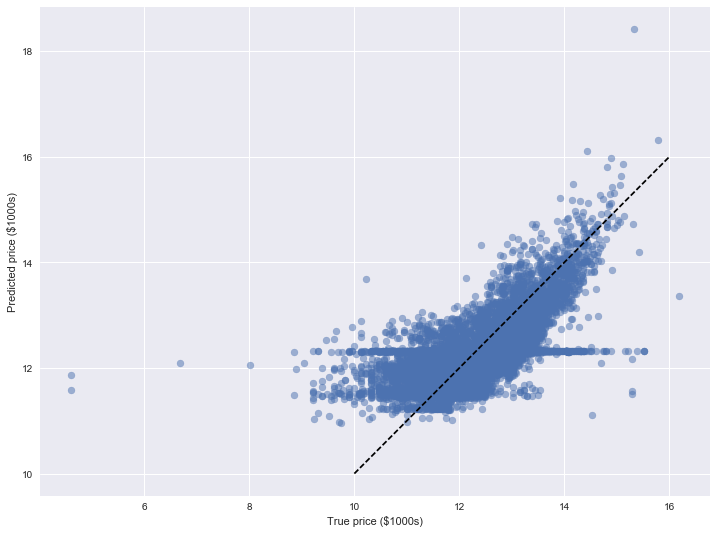

In [134]:
clf = linear_model.LinearRegression() 
clf.fit(x_train , y_train) 
predicted = clf.predict(x_train) 
f, ax = plt.subplots(figsize=(12, 9))
plt.scatter(y_train , predicted , alpha =0.5)
plt.plot([10, 16], [10, 16], '--k') 
plt.axis('tight')
plt.xlabel('True price ($1000s)') 
plt.ylabel('Predicted price ($1000s)')